<a href="https://colab.research.google.com/github/Akkijd/DataScience-projects/blob/main/Task%205/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white') 

In [41]:
df=pd.read_csv('/content/takehome_users.csv',encoding='latin-1')

In [42]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [44]:
df.rename(columns={'object_id':'user_id'}, inplace=True)

In [45]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [46]:
users_engaged=pd.read_csv('/content/takehome_user_engagement.csv')

In [47]:
users_engaged.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [48]:
users_engaged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [49]:
users_engaged.time_stamp=pd.to_datetime(users_engaged.time_stamp)

In [50]:
users_engaged2=users_engaged.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()


In [51]:
users_engaged2=pd.DataFrame(users_engaged2)

In [52]:
users_engaged2.head()

visited
user_id time_stamp         
1       2014-04-22        1
2       2013-11-15        1
        2013-11-16        0
        2013-11-17        0
        2013-11-18        0

In [53]:
# Sum number of visits for seven-rolling-day periods.
users_engaged2 = users_engaged2.rolling(window=7, min_periods=1).sum()

In [54]:
users_engaged2.reset_index(inplace=True)

In [55]:
users_engaged2.head()

,user_id,time_stamp,visited
0,1,2014-04-22,1.0
1,2,2013-11-15,2.0
2,2,2013-11-16,2.0
3,2,2013-11-17,2.0
4,2,2013-11-18,2.0


In [56]:
# Computing max number of visits for each user for seven-rolling-day periods.
users_engaged3 = users_engaged2.groupby('user_id')[['visited']].max()

In [57]:
users_engaged3.head()

,visited
user_id,
1,1.0
2,3.0
3,2.0
4,3.0
5,4.0


In [58]:
# Adding target column 'adopted'
users_engaged3.loc[users_engaged3['visited'] >= 3, 'adopted_user'] = 1
users_engaged3.loc[users_engaged3['visited'] < 3, 'adopted_user'] = 0

In [59]:
# Changing data type to 'int'
users_engaged3['visited'] = users_engaged3['visited'].astype(int)
users_engaged3['adopted_user'] = users_engaged3['adopted_user'].astype(int)

In [60]:
users_engaged3.reset_index(inplace=True) 
users_engaged3.head()

,user_id,visited,adopted_user
0,1,1,0
1,2,3,1
2,3,2,0
3,4,3,1
4,5,4,1


In [61]:
# Merging two data frames
df = users_engaged3.merge(df, how='inner', on='user_id', sort=True)

In [62]:
df.head(5)

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,3,1,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,4,1,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [63]:
df.isnull().sum()

user_id                          0
visited                          0
adopted_user                     0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            4047
dtype: int64

In [64]:
# Filling the invited_by_user_id column's NaN values with 0.
df['invited_by_user_id'].fillna(0, inplace=True)
df['invited_by_user_id'] = df['invited_by_user_id'].astype(int)

In [65]:
# Doing some feature engineering
df.creation_time = pd.to_datetime(df.creation_time)
df.last_session_creation_time = pd.to_datetime(df.last_session_creation_time)
df['active_days'] = df['last_session_creation_time'] - df['creation_time']
df['active_days'] = df['active_days'].dt.days

In [66]:
df.head()

,user_id,visited,adopted_user,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803,-16183
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316,-16025
2,3,2,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525,-15784
3,4,3,1,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151,-15847
4,5,4,1,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240,-15723


In [67]:
df.isnull().sum()

user_id                       0
visited                       0
adopted_user                  0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
active_days                   0
dtype: int64

In [68]:
# Selecting columns for machine learning algorithms
df_new = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
              'org_id', 'invited_by_user_id', 'active_days', 'adopted_user' ]]

In [69]:
df_new.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,adopted_user
0,GUEST_INVITE,1,0,11,10803,-16183,0
1,ORG_INVITE,0,0,1,316,-16025,1
2,ORG_INVITE,0,0,94,1525,-15784,0
3,GUEST_INVITE,0,0,1,5151,-15847,1
4,GUEST_INVITE,0,0,193,5240,-15723,1


Class 0: 808
Class 1: 8015
Proportion of class 0 is  9.16 %


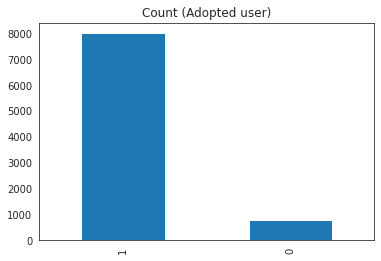

In [70]:
# Huge imbalance between the two target classes.
target_count=df_new.adopted_user.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (Adopted user)');

In [95]:

X=df_new.iloc[:,1:-1]

y=df_new.iloc[:,-1]




In [76]:
!pip install imblearn

In [77]:
import imblearn

In [96]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [97]:
#we balance the data using the SMOTETOMEK technique:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_balanced, y_balanced = smt.fit_resample(X_train, y_train)

In [98]:
y_train.value_counts()

1    5618
0     558
Name: adopted_user, dtype: int64

In [99]:
y_balanced.value_counts()

1    5070
0    5070
Name: adopted_user, dtype: int64

In [100]:
X_balanced.shape

(10140, 5)

In [101]:
y_balanced.shape

(10140,)

In [105]:
# Make dummy variables that we drop in the first place
creation_source_dum = pd.get_dummies(df_new['creation_source'], drop_first=True)
creation_source_dum

,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,0,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
8818,1,0,0,0
8819,0,0,0,1
8820,0,0,0,0
8821,0,1,0,0


In [106]:
#We need to concatinate the creation_source dummy with the X_balanced dataset to get all features.
X = pd.concat([X_balanced, creation_source_dum], axis=1)
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,0,0,192,0,-15965,0.0,0.0,0.0,0.0
1,0,0,157,4922,-15819,1.0,0.0,0.0,0.0
2,0,1,12,0,-16111,1.0,0.0,0.0,0.0
3,0,0,92,0,-15565,0.0,0.0,0.0,0.0
4,0,0,52,0,-16176,0.0,0.0,0.0,0.0


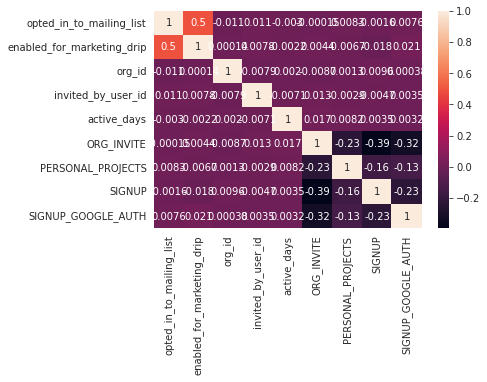

In [107]:
#Plot the correlation between the features
corr = X.corr()
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)

Now we can see correlation between SIGNUP &ORG_INVITE,SIGNUP_GOOGLE_AUTH & SIGNUP(Negative correlation),SIGNUP_GOOGLE_AUTH & ORG_INVITE(Negative correlation) and opted_in_to_mailing_list & enabled_for_marketing_drip

#Data Cleaning is done now.Now we need to know which features are important to predict future adopted user.





In [124]:
# Use Random Forest to evaluate the importance of features on the classification task.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
# Train the model on training data
rf.fit(X_train,y_train)
y_predicted = rf.predict(X_test)

#Feature importance
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_balanced, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: invited_by_user_id   Importance: 0.35
Variable: active_days          Importance: 0.31
Variable: org_id               Importance: 0.28
Variable: opted_in_to_mailing_list Importance: 0.03
Variable: enabled_for_marketing_drip Importance: 0.03


[None, None, None, None, None]

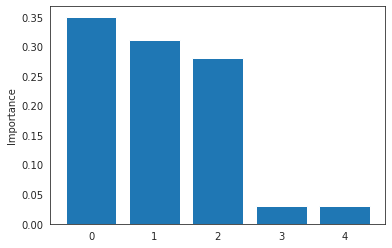

In [201]:
import numpy as np
import matplotlib.pyplot as plt
feature_importances.sort(key=lambda x: x[1], reverse=True)
feature_importances
feature = list(zip(*feature_importances))[0]
importance = list(zip(*feature_importances))[1]
x=np.arange(len(feature))
plt.bar(x,importance,align='center')
plt.xticks(x,x) 
plt.ylabel('Importance')
plt.show()

##Plotting important features

###From the above graph we can conclude that the important features to predict whether a user is an 'adopted user' ara:
####0.invited_by_user_id
####1.Number of active_days
####2.organization_id